In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("HR_data.csv")
df

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
5,6,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined
6,7,2119124,Yes,37,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined
7,9,2127572,Yes,16,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Healthcare,Noida,34,Joined
8,11,2138169,No,1,30,E1,-22.22,-22.22,0.00,No,No,Female,Employee Referral,3,BFSI,Gurgaon,26,Joined
9,12,2143362,No,6,30,E1,240.00,220.00,-5.88,No,No,Male,Employee Referral,3,CSMP,Chennai,34,Joined


In [3]:
df.shape

(8995, 18)

In [4]:
df['SLNO'].nunique()

8995

In [5]:
df['Status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

In [6]:
df1=df.copy()

In [7]:
df1.drop(['SLNO','Candidate.Ref'],axis=1,inplace=True)

In [8]:
df1.isnull().sum()

DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [9]:
df1.dtypes

DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

# Data Visualisation 

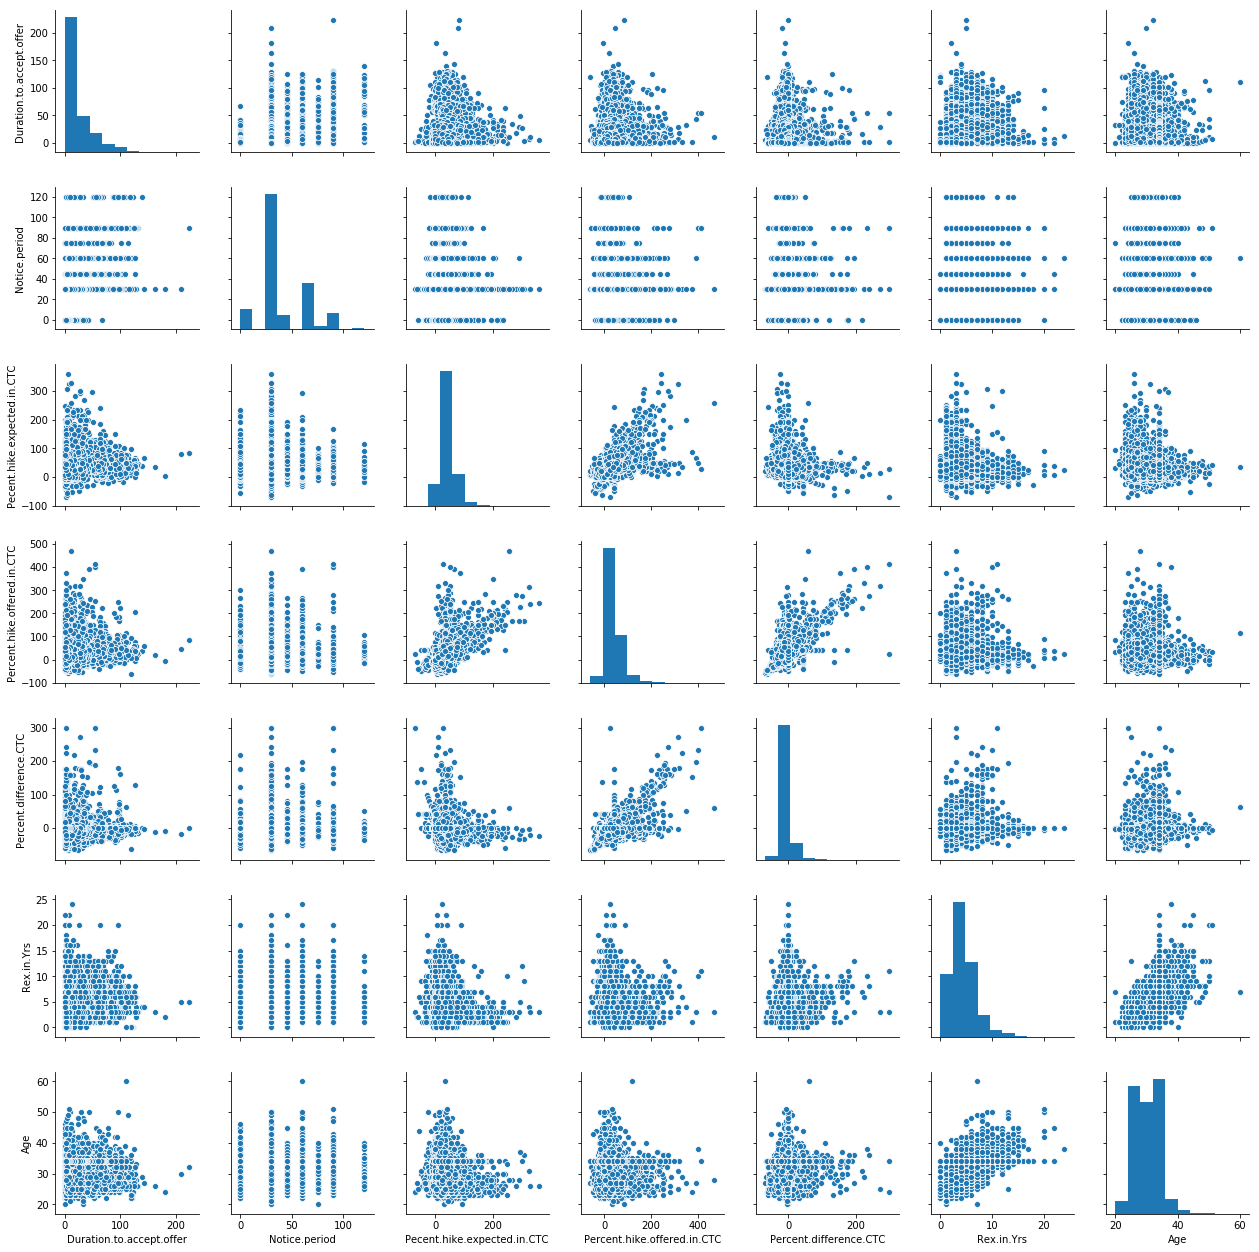

In [10]:
sns.pairplot(df1)

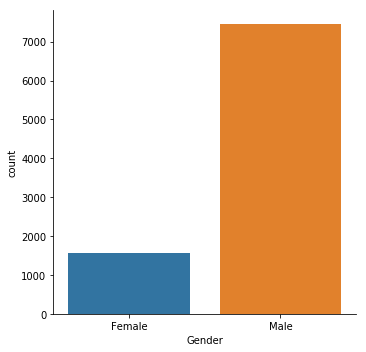

In [70]:
sns.catplot('Gender',data=df1,kind='count')

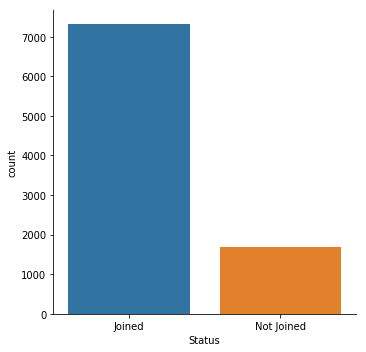

In [71]:
sns.catplot('Status',data=df1,kind='count')

# Comparing Status with Location

In [65]:
# crosstab is used for count
ps=pd.crosstab(df1['Location'],df1['Status'])
ps

Status,Joined,Not Joined
Location,,
Ahmedabad,5,1
Bangalore,1742,488
Chennai,2486,664
Cochin,7,1
Gurgaon,118,28
Hyderabad,266,75
Kolkata,100,29
Mumbai,176,21
Noida,2362,365


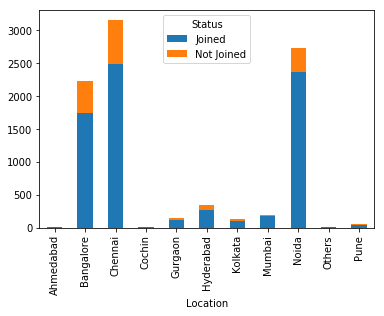

In [66]:
ps.plot(kind='bar',stacked=True) #assumes like pie chart

# Comparing Status with Gender

In [67]:
# crosstab is used for count
ps_1=pd.crosstab(df1['Gender'],df1['Status'])
ps_1

Status,Joined,Not Joined
Gender,,
Female,1278,273
Male,6035,1409


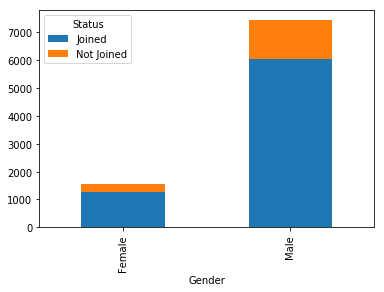

In [68]:
ps_1.plot(kind='bar',stacked=True) #assumes like pie chart

# Compare Status with Candidate Relocate from actual 

In [72]:
# crosstab is used for count
ps_2=pd.crosstab(df1['Candidate.relocate.actual'],df1['Status'])
ps_2

Status,Joined,Not Joined
Candidate.relocate.actual,,
No,6023,1682
Yes,1290,0


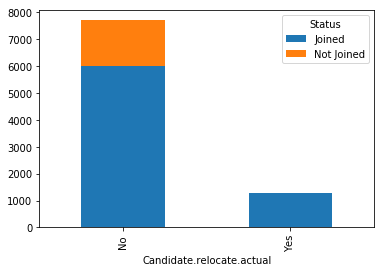

In [74]:
ps_2.plot(kind='bar',stacked=True) #assumes like pie chart

# checking multi collinearity

In [11]:
corr=df1.corr()
corr

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
Duration.to.accept.offer,1.000000,0.363760,0.018821,0.007307,-0.009395,0.113951,0.020131
Notice.period,0.363760,1.000000,-0.005262,-0.013458,-0.015067,0.181786,-0.004967
Pecent.hike.expected.in.CTC,0.018821,-0.005262,1.000000,0.668594,-0.161501,-0.217391,-0.137705
Percent.hike.offered.in.CTC,0.007307,-0.013458,0.668594,1.000000,0.598779,-0.110243,-0.080010
Percent.difference.CTC,-0.009395,-0.015067,-0.161501,0.598779,1.000000,0.081547,0.037955
Rex.in.Yrs,0.113951,0.181786,-0.217391,-0.110243,0.081547,1.000000,0.568228
Age,0.020131,-0.004967,-0.137705,-0.080010,0.037955,0.568228,1.000000


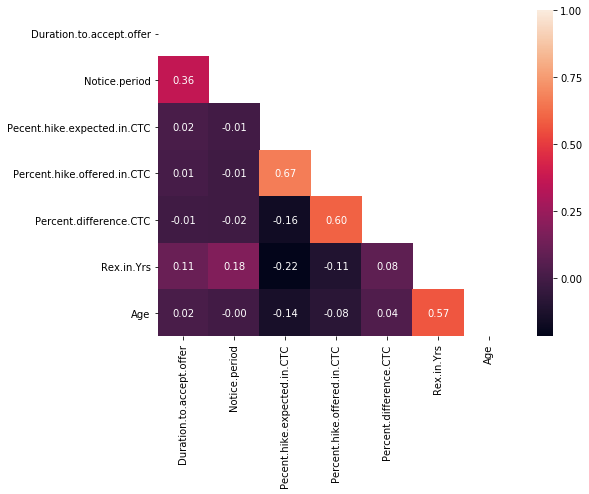

In [12]:
plt.figure(figsize=(8,6))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,fmt='0.2f',mask=mask)

In [13]:
# consider numerical data
num_col=df1.dtypes[df1.dtypes=='int64'].index

In [14]:
x_num=df1[num_col]

In [15]:
x_num.shape

(8995, 4)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif=pd.DataFrame()
vif['Features']=x_num.keys()
vif['Values']=[variance_inflation_factor(x_num.values,i) for i in range(4)]
vif


,Features,Values
0,Duration.to.accept.offer,1.951738
1,Notice.period,4.562312
2,Rex.in.Yrs,4.834467
3,Age,7.014953


# creating dummies for only categeorical  values

In [18]:
Xf = pd.get_dummies(df1,drop_first=True) # dummies for categorical values (only for objects)

In [19]:
Xf

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,...,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Status_Not Joined
0,14,30,-20.79,13.16,42.86,7,34,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,18,30,50.00,320.00,180.00,8,34,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,45,42.84,42.84,0.00,4,27,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,26,30,42.84,42.84,0.00,4,34,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,120,42.59,42.59,0.00,6,34,1,0,1,...,0,0,0,0,0,0,1,0,0,0
5,17,30,42.83,42.83,0.00,2,34,1,1,0,...,0,0,0,0,0,0,1,0,0,0
6,37,30,31.58,31.58,0.00,7,32,1,0,1,...,0,0,0,0,0,0,1,0,0,0
7,16,0,-20.00,-20.00,0.00,8,34,1,1,0,...,0,0,0,0,0,0,1,0,0,0
8,1,30,-22.22,-22.22,0.00,3,26,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9,6,30,240.00,220.00,-5.88,3,34,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
X = Xf.iloc[:,:-1] 
Y = Xf.iloc[:,-1]

In [21]:
Y.shape

(8995,)

In [22]:
Y.value_counts()
# class 1 for not joined
# class 0 for joined

0    7313
1    1682
Name: Status_Not Joined, dtype: int64

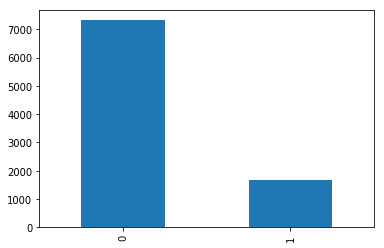

In [23]:
Y.value_counts().plot('bar')

# from above bar chart it is clearly imbalanced dataset

In [24]:
X.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14,30,-20.79,13.16,42.86,7,34,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,18,30,50.00,320.00,180.00,8,34,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,45,42.84,42.84,0.00,4,27,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,26,30,42.84,42.84,0.00,4,34,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,120,42.59,42.59,0.00,6,34,1,0,1,...,0,0,0,0,0,0,0,1,0,0


# Feature Engineering

# backward elimination

In [25]:
model=sm.GLM(Y,X).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Status_Not Joined   No. Observations:                 8995
Model:                            GLM   Df Residuals:                     8961
Model Family:                Gaussian   Df Model:                           33
Link Function:               identity   Scale:                         0.13754
Method:                          IRLS   Log-Likelihood:                -3824.0
Date:                Thu, 02 Jan 2020   Deviance:                       1232.5
Time:                        22:58:34   Pearson chi2:                 1.23e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Duration.to.accept.offer           -5.451e-05      0.000     -0.312      0.755     

In [26]:
model.pvalues.sort_values(ascending=False).index[0]

'Duration.to.accept.offer'

In [27]:
model=sm.GLM(Y,X).fit()
while model.pvalues.sort_values(ascending=False)[0] > 0.025:
    model=sm.GLM(Y,X).fit()
    high = model.pvalues.sort_values(ascending=False).index[0]
    X.drop(high,axis=1,inplace=True)
    
model=sm.GLM(Y,X).fit()
    # here  row 0 indexing after that 1 indexing 

In [28]:
a = model.pvalues
a

Notice.period                         4.826782e-59
Age                                   5.489560e-03
DOJ.Extended_Yes                      4.296032e-04
Offered.band_E1                       3.327047e-06
Offered.band_E2                       7.672301e-04
Offered.band_E3                       3.991973e-04
Candidate.relocate.actual_Yes         8.580802e-75
Candidate.Source_Direct               1.397695e-07
Candidate.Source_Employee Referral    1.021573e-12
LOB_BFSI                              6.029533e-05
LOB_CSMP                              2.130388e-03
LOB_ERS                               9.750372e-04
LOB_ETS                               1.065362e-05
LOB_Healthcare                        7.364325e-03
LOB_INFRA                             3.552627e-15
LOB_MMS                               9.042740e-04
Location_Bangalore                    1.968318e-25
Location_Chennai                      1.300859e-27
Location_Cochin                       1.514567e-03
Location_Gurgaon               

# selecting only important features

In [29]:
X.keys()

Index(['Notice.period', 'Age', 'DOJ.Extended_Yes', 'Offered.band_E1',
       'Offered.band_E2', 'Offered.band_E3', 'Candidate.relocate.actual_Yes',
       'Candidate.Source_Direct', 'Candidate.Source_Employee Referral',
       'LOB_BFSI', 'LOB_CSMP', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare',
       'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore', 'Location_Chennai',
       'Location_Cochin', 'Location_Gurgaon', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Noida',
       'Location_Others', 'Location_Pune'],
      dtype='object')

In [30]:
len(a)
# 26 columns are there

26

In [31]:
len(X.columns)

26

In [32]:
type(a)

pandas.core.series.Series

# Splitting Data into Training and Testing

In [33]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(X_train,Y_train)

C:\Users\Gopidi Harish Reddy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)[:,1]
y_pred_prob
# prob values for class 1

array([0.35154956, 0.25471067, 0.4607052 , ..., 0.01271296, 0.00235683,
       0.25795667])

In [38]:
import innomatics

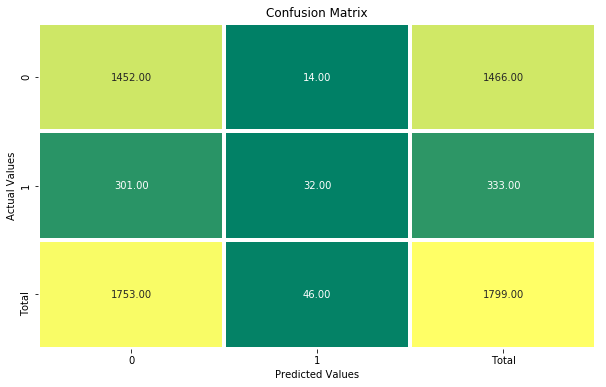

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1466
           1       0.70      0.10      0.17       333

    accuracy                           0.82      1799
   macro avg       0.76      0.54      0.54      1799
weighted avg       0.80      0.82      0.77      1799


************************************Kappa Score************************************


Kappa Score = 0.12976343128296874

******************************Area Under Curve Score******************************


AUC Score = 0.5432731503672841
Number of probabilities to build ROC = 672


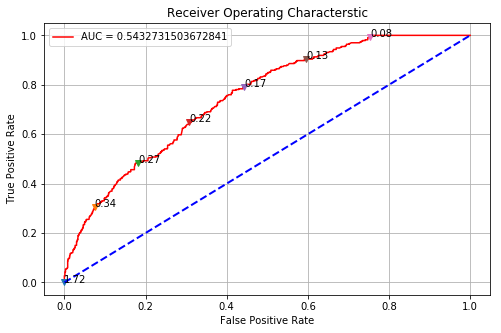

In [39]:
innomatics.classification_metric(Y_test,y_pred,y_pred_prob, ['0','1'],n=100,verbose=True)

# APPLY SMOTE(for Imbalance )

In [40]:
import imblearn
from imblearn.over_sampling import SMOTE

In [41]:
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(X,Y)

1    7313
0    7313
dtype: int64

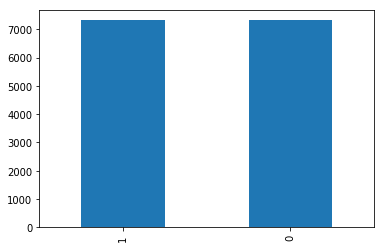

In [42]:
pd.Series(y_resample).value_counts().plot('bar')
pd.Series(y_resample).value_counts()

- from above bar chart it is balanced dataset

# Applying Model

In [43]:
# splitting trained and test dataset
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10238, 26), (4388, 26), (10238,), (4388,))

In [44]:
model1=LogisticRegression()

In [45]:
model1.fit(x_train,y_train)

C:\Users\Gopidi Harish Reddy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred_train=model.predict_proba(x_train)
y_pred_train1=y_pred_train[:,1]
# prob values for class 1(not joined)

In [47]:
y_pred_test=model.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [48]:
y_pred_test1=model.predict_proba(x_test)
y_pred_test2=y_pred_test1[:,1]

In [49]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [50]:
from sklearn.metrics import log_loss

In [51]:
class threshold():
    def __init__(self):
        self.th=0.5

    def  predict_threshold(self,y):
   
        if y>=self.th:
            return 1
        else:
            return 0

In [52]:
probabilites=np.linspace(0,1,num=100)
mle=[]
pre =threshold()
for p in probabilites:
    pre.th=p
    yy=pd.Series(y_pred_train1)
    y_pred_0_5=yy.apply(pre.predict_threshold)
    loss=log_loss(y_train,y_pred_0_5)
    mle.append(loss)

In [53]:
mle
# by using mle threshold value is found

[17.236051352302162,
 14.405546931753813,
 14.253732034346571,
 14.22674271925195,
 14.152522024640806,
 14.04119070937079,
 13.838770455656432,
 13.626228115368422,
 13.329342915794673,
 12.97847916413262,
 12.5264050122601,
 12.111440778137977,
 11.723464531394486,
 11.372599061511737,
 10.954259210479274,
 10.691103078982557,
 10.502168969812981,
 10.424565551105891,
 10.171533927311986,
 9.979227950077215,
 9.80716106942861,
 9.71943689186386,
 9.662073194550459,
 9.793629313934497,
 9.935308613305358,
 10.09723177341976,
 10.265900856490886,
 10.404211177531355,
 10.758429693152603,
 11.095780745950057,
 11.342046296744554,
 11.790727415196972,
 11.996510477267408,
 12.21916365759362,
 12.50254185967144,
 12.762304332940527,
 13.05580227856378,
 13.285204427783398,
 13.571957387661216,
 13.821601288898977,
 14.013893129863494,
 14.2163067449979,
 14.418719969627602,
 14.627880991636601,
 14.793186016736596,
 14.931502117246673,
 15.059697068394387,
 15.228375445477447,
 15.3262085

Text(0, 0.5, '- (log likelihood)')

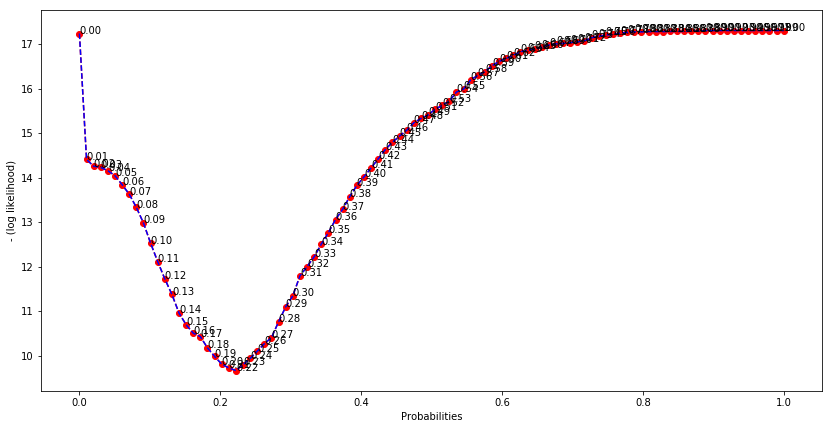

In [54]:
plt.figure(figsize=(14,7))
plt.plot(probabilites,mle,'ro--')
plt.plot(probabilites,mle,'b--')
for i,p in enumerate(probabilites):
    plt.text(probabilites[i],mle[i],'%0.2f'%(p))

sns.scatterplot(x=probabilites,y=mle)
plt.xlabel('Probabilities')
plt.ylabel('- (log likelihood)')
# mle values are  found by using prob and loglikelihood

In [55]:
a=np.array(mle).argmin()
probabilites[a]

0.22222222222222224

In [56]:
#apply to test data
y_pred_prob_test=model.predict_proba(x_test)
y_pred_prob_test1=y_pred_prob_test[:,1] # array(numpy)

In [57]:
pre=threshold()
threh_prob=0.1779#rom mle
pre.th=threh_prob #setting threshold
yy=pd.Series(y_pred_prob_test1)
y_pred_class_test=yy.apply(pre.predict_threshold)

# Evaluation

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

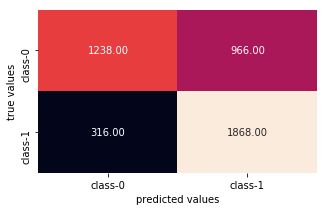

In [59]:
cm=confusion_matrix(y_test,y_pred_class_test)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.show()
# fp=1.35 times fn rate

-  from above metrics  False positive = 3.057 times False negative

In [60]:
cr=classification_report(y_test,y_pred_class_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.56      0.66      2204
           1       0.66      0.86      0.74      2184

    accuracy                           0.71      4388
   macro avg       0.73      0.71      0.70      4388
weighted avg       0.73      0.71      0.70      4388



In [61]:
from sklearn.metrics import cohen_kappa_score,roc_auc_score
cohen_kappa_score(y_test,y_pred_class_test)


0.416454980834168

In [62]:
roc_auc_score(y_test,y_pred_class_test)

0.7085086722110316

# conclusion 

# Recall increases (True positive rate increases) than precision
### The candidates not joining is 86%  of Recall